<a href="https://colab.research.google.com/github/datasciencechampion/Zero-to-Hero-in-NLP-LLM-GenAI-AGI/blob/main/Data%20Structure/SearchingAlgorigthm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Search Algorithm**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- Linear Search
- Binary Search
- Jump Search
- Fibonacci Search
- Exponential Search
- Interpolation Search


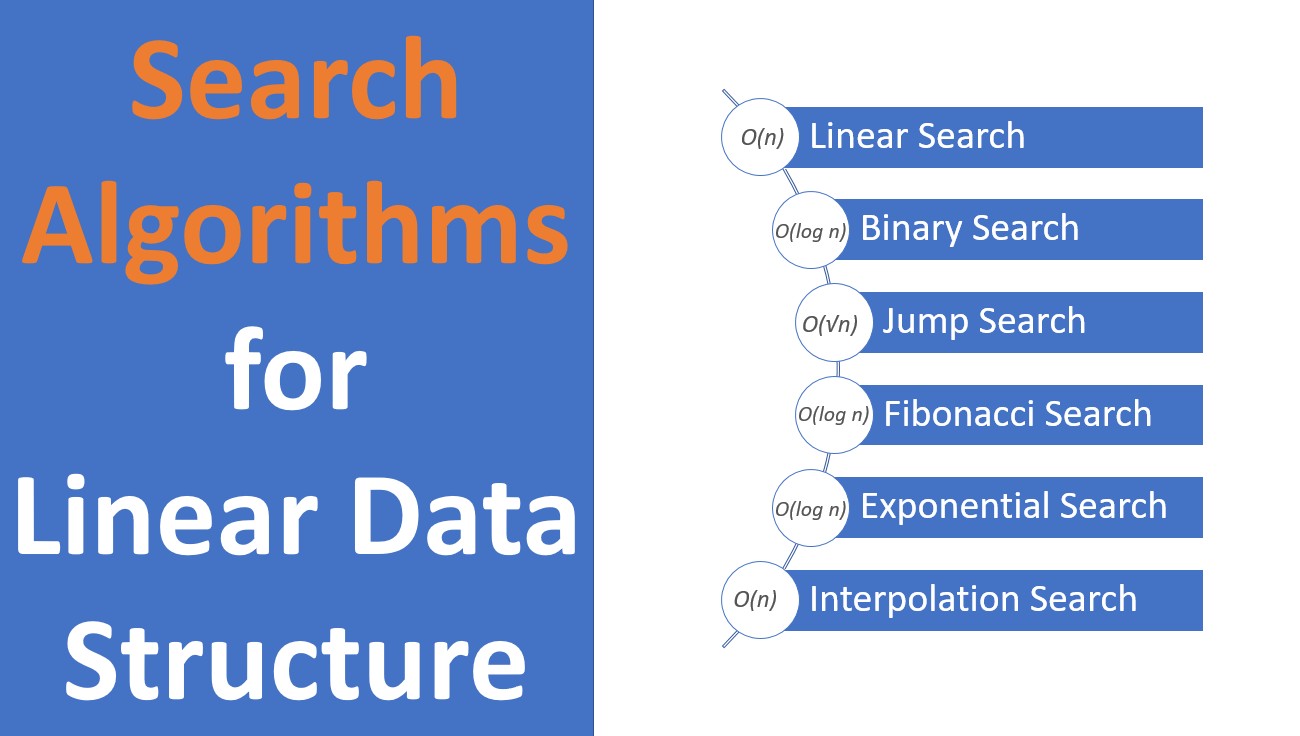

# **Linear Search**



⭐ One of the simplest searching algorigthm

⭐ Iterates over an array/list and returns the index of the first occurance of the element

⭐ Time Complexity : O(n).  Time taken to execute increases with the number of items in our input list.

❌ Linear search is not often used in practice, because the same efficiency can be achieved by using inbuilt methods or existing operators, and it is not as fast or efficient as other search algorithms.

✅ Linear search is a good for finding the first occurrence of an item in an unsorted collection because unlike most other search algorithms, it does not require that a collection be sorted before searching begins.


In [ ]:
def LinearSearch(mylist, element):
    for i in range (len(mylist)):
        if mylist[i] == element:
            return i
    return -1

In [ ]:
print(LinearSearch([10,200,3,400,5,2,1], 2))

5


# **Binary Search**



⭐ Requires input array/list to be sorted.

⭐ It follows Divide & Conquer methology

⭐ Faster than Linear Search

⭐ This is how it works. ⭕ Say we're searching for a value **val** in a sorted array.

  🟤 the algorithm compares **val** to the value of the **middle element** of the array, which we'll call **mid**.

  🟤 If mid is the element we are looking for (best case), we return its index.

  🟤 If not, we identify which side of mid val is more likely to be on based on whether val is smaller or greater than mid, and discard the other side of the array.

  🟤 We then recursively or iteratively follow the same steps, choosing a new value for mid, comparing it with val and discarding half of the possible matches in each iteration of the algorithm.

⭐ The binary search algorithm can be written either recursively or iteratively. Recursion is generally slower in Python because it requires the allocation of new stack frames.






⭐ Time Complexity : O(logn).  
The action that the algorithm performs next in each iteration is one of several possibilities:

*   Returning the index of the current element
*   Searching through the left half of the array
*   Searching through the right half of the array

We can only pick one possibility per iteration, and our pool of possible matches gets divided by two in each iteration. This makes the time complexity of binary search **O(log n)**.

❌ One drawback of binary search is that if there are multiple occurrences of an element in the array, it does not return the index of the first element, but rather the index of the element closest to the middle.

✅ Binary search is quite commonly used in practice because it is efficient and fast when compared to linear search. However, it does have some shortcomings, such as its reliance on the // operator. There are many other divide and conquer search algorithms that are derived from binary search, let's examine a few of those next.

In [ ]:
def BinarySearch(my_sorted_list, element):
    left = 0
    right = len(my_sorted_list)-1
    index = -1
    while (left <= right) and (index == -1):
        mid = (left+right)//2
        if my_sorted_list[mid] == element:
            index = mid
        else:
            if element<my_sorted_list[mid]:
                right = mid -1
            else:
                left = mid +1
    return index

In [ ]:
# list should be sorted
BinarySearch([100,200,300,400,500,600,700], 300)

2

# **Jump Search**



⭐ Similar to binary search it also works on a sorted array, and uses a similar **divide and conquer** approach to search through it.

⭐ It depends on linear search to perform the actual comparison when searching for a value.

⭐ It can be classified as an improvement of the linear search algorithm since.

⭐ How it works :

* Given a sorted array, instead of searching through the array elements
incrementally, we **search in jumps**.

* So in our input list **mylist**, if we have a jump size of jump, our algorithm will consider elements in the order **mylist[0], mylist[0+jump], mylist[0+2jump], mylist[0+3jump]** and so on.


* With each jump, we store the previous value we looked at and its index.

* When we find a set of values where **mylist[i] < element < mylist[i+jump]**, we perform a **linear search** with mylist[i] as the left-most element and mylist[i+jump] as the right-most element in our search set:


⭐ Time Complexity : O(√n).  

The time complexity of jump search is O(√n), where √n is the jump size, and n is the length of the list, **placing jump search between the linear search and binary search algorithms in terms of efficiency**.

The single most important advantage of jump search when compared to binary search is that it does not rely on the division operator (/).

In most CPUs, using the division operator is costly when compared to other basic arithmetic operations (addition, subtraction, and multiplication), because the implementation of the division algorithm is iterative.



⭕ The cost by itself is very small, but when the number of elements to search through is very large, and the number of division operations that we need to perform increases, the cost can add up incrementally. Therefore jump search is better than binary search when there is a large number of elements in a system where even a small increase in speed matters.

To make jump search faster, we could use binary search or another internal jump search to search through the blocks, instead of relying on the much slower linear search.

In [ ]:
import math

def JumpSearch (my_sorted_list, element):
    length = len(my_sorted_list)
    jump = int(math.sqrt(length))
    left, right = 0, 0
    while left < length and my_sorted_list[left] <= element:
        right = min(length - 1, left + jump)
        if my_sorted_list[left] <= element and my_sorted_list[right] >= element:
            break
        left += jump;
    if left >= length or my_sorted_list[left] > element:
        return -1
    right = min(length - 1, right)
    i = left
    while i <= right and my_sorted_list[i] <= element:
        if my_sorted_list[i] == element:
            return i
        i += 1
    return -1

In [ ]:
print(JumpSearch([100,200,300,400,500,600,700], 300))

2


# **Fibonacci Search**



⭐ It also works on a sorted array, and uses a similar **divide and conquer** approach to search through it.

⭐ It is similar to both both binary search and jump search it uses **Fibonacci numbers** to calculate the block size or search range in each step.

⭐ Fibonacci numbers start with zero and follow the pattern **0, 1, 1, 2, 3, 5, 8, 13, 21...** where each element is the addition of the two numbers that immediately precede it.


⭐ The algorithm works with **three Fibonacci numbers** at a time. Let's call the three numbers fibNumber, fibNumber_minus_1, and fibNumber_minus_2 where fibNumber_minus_1 and fibNumber_minus_2 are the two numbers immediately before fibNumber in the sequence and fibNumber = fibNumber_minus_1 + fibNumber_minus_2

⭐ We initialize the values to 0,1, and 1 or the first three numbers in the Fibonacci sequence to avoid getting an index error in the case where our search array mylist contains a very small number of items.

Then we choose the smallest number of the Fibonacci sequence that is greater than or equal to the number of elements in our search array mylist, as the value of fibNumber, and the two Fibonacci numbers immediately before it as the values of fibNumber_minus_1 and fibNumber_minus_2. While the array has elements remaining and the value of fibNumber is greater than one, we:

Compare val with the value of the block in the range up to fibNumber_minus_2, and return the index of the element if it matches.
If the value is greater than the element we are currently looking at, we move the values of fibNumber, fibNumber_minus_1 and fibNumber_minus_2 two steps down in the Fibonacci sequence, and reset the index to the index of the element.
If the value is less than the element we are currently looking at, we move the values of fibNumber, fibNumber_minus_1 and fibNumber_minus_2 one step down in the Fibonacci sequence.

⭐ How it works : Say we have a sorted mylist [1,2,3,4,5,6,7,8,9,10,11] and trying to search 6 in it.

* Determining the smallest Fibonacci number greater than or equal to the length of the list as fibNumber; in this case, the smallest Fibonacci number meeting our requirements is 13.
* The values would be assigned as:
    * fibNumber = 13
    * fibNumber_minus_1 = 8
    * fibNumber_minus_2 = 5
    * index = -1

* Next, we check the element mylist[4] where 4 is the minimum of -1+5 . Since the value of mylist[4] is 5, which is smaller than the value we are searching for, we move the Fibonacci numbers one step down in the sequence, making the values:
   * fibNumber = 8
   * fibNumber_minus_1 = 5
   * fibNumber_minus_2 = 3
   * index = 4
* Next, we check the element mylist[7] where 7 is the minimum of 4+3. Since the value of mylist[7] is 8, which is greater than the value we are searching for, we move the Fibonacci numbers two steps down in the sequence.
   * fibNumber = 3
   * fibNumber_minus_1 = 2
   * fibNumber_minus_2 = 1
   * index = 4
* Now we check the element mylist[5] where 5 is the minimum of 4+1 . The value of mylist[5] is 6, which is the value we are searching for!


⭐ Time Complexity : O(log n) same as binary search.

The time complexity for Fibonacci search is O(log n); the same as binary search. This means the algorithm is faster than both linear search and jump search in most cases.

Fibonacci search can be used when we have a very large number of elements to search through, and we want to reduce the inefficiency associated with using an algorithm which relies on the division operator.

An additional advantage of using Fibonacci search is that it can accommodate input arrays that are too large to be held in CPU cache or RAM, because it searches through elements in increasing step sizes, and not in a fixed size.


In [ ]:
def FibonacciSearch(my_sorted_list, element):
    fibNumber_minus_2 = 0
    fibNumber_minus_1 = 1
    fibNumber = fibNumber_minus_1 + fibNumber_minus_2
    while (fibNumber < len(my_sorted_list)):
        fibNumber_minus_2 = fibNumber_minus_1
        fibNumber_minus_1 = fibNumber
        fibNumber = fibNumber_minus_1 + fibNumber_minus_2
    index = -1;
    while (fibNumber > 1):
        i = min(index + fibNumber_minus_2, (len(my_sorted_list)-1))
        if (my_sorted_list[i] < element):
            fibNumber = fibNumber_minus_1
            fibNumber_minus_1 = fibNumber_minus_2
            fibNumber_minus_2 = fibNumber - fibNumber_minus_1
            index = i
        elif (my_sorted_list[i] > element):
            fibNumber = fibNumber_minus_2
            fibNumber_minus_1 = fibNumber_minus_1 - fibNumber_minus_2
            fibNumber_minus_2 = fibNumber - fibNumber_minus_1
        else :
            return i
    if(fibNumber_minus_1 and index < (len(my_sorted_list)-1) and my_sorted_list[index+1] == element):
        return index+1;
    return -1

In [ ]:
print(FibonacciSearch([1,2,3,4,5,6,7,8,9,10,11], 6))

5


# **Exponential Search**



⭐ It is also known by the names **galloping search**, **doubling search** and **Struzik search**.

⭐ It also works on a sorted array, and uses a similar **divide and conquer** approach to search through it.

⭐ Exponential search depends on binary search to perform the final comparison of values.

⭐ The algorithm works by determining the range where the element we're looking for is likely to be using binary search for the range to find the exact index of the item.

⭐ How it works :

The algorithm works by:

  * Checking whether the first element in the list matches the value we are searching for - since lys[0] is 1 and we are searching for 3, we set the index to 1 and move on.
  * Going through all the elements in the list, and while the item at the index'th position is less than or equal to our value, exponentially increasing the value of index in multiples of two:
    * index = 1, lys[1] is 2, which is less than 3, so the index is multiplied by 2 and set to 2.
    * index = 2, lys[2] is 3, which is equal to 3, so the index is multiplied by 2 and set to 4.
    * index = 4, lys[4] is 5, which is greater than 3; the loop is broken at this point.

* It then performs a binary search by slicing the list; arr[:4]. In Python, this means that the sub list will contain all elements up to the 4th element, so we're actually calling: BinarySearch([1,2,3,4], 3), which would return: 2

Which is the index of the element we are searching for in both the original list, and the sliced list that we pass on to the binary search algorithm.

⭐ Time Complexity : O(log i)

Exponential search runs in O(log i) time, where i is the index of the item we are searching for. In its worst case, the time complexity is O(log n), when the last item is the item we are searching for (n being the length of the array).

Exponential search works better than binary search when the element we are searching for is closer to the beginning of the array. In practice, we use exponential search because it is one of the most efficient search algorithms for unbounded or infinite arrays.

In [ ]:
def BinarySearch(my_sorted_list, element):
    left = 0
    right = len(my_sorted_list)-1
    index = -1
    while (left <= right) and (index == -1):
        mid = (left+right)//2
        if my_sorted_list[mid] == element:
            index = mid
        else:
            if element<my_sorted_list[mid]:
                right = mid -1
            else:
                left = mid +1
    return index

def ExponentialSearch(my_sorted_list, element):
    if my_sorted_list[0] == element:
        return 0
    index = 1
    while index < len(my_sorted_list) and my_sorted_list[index] <= element:
        index = index * 2
    return BinarySearch( arr[:min(index, len(my_sorted_list))], element)

In [ ]:
print(ExponentialSearch([1,2,3,4,5,6,7,8],3))

NameError: ignored

# **Interpolation Search**



⭐ It also works on a sorted array, and uses a similar **divide and conquer** approach to search through it.

⭐ Unlike binary search, it does not always begin searching at the middle. Interpolation search calculates the probable position of the element we are searching for using the formula:

⭕ index = low + [(element-my_sorted_list[low])*(high-low) / (my_sorted_list[high]-mylist[low])]

Where the variables are:

* my_sorted_list - our input array
* element - the element we are searching for
* index - the probable index of the search element. This is computed to be a higher value when element is closer in value to the element at the end of the array (my_sorted_list[high]), and lower when element is closer in value to the element at the start of the array (my_sorted_list[low])
* low - the starting index of the array
* high - the last index of the array

The algorithm searches by calculating the value of index:

* If a match is found (when my_sorted_list[index] == element), the index is returned
* If the value of element is less than my_sorted_list[index], the value for the index is re-calculated using the formula for the left sub-array
* If the value of element is greater than my_sorted_list[index], the value for the index is re-calculated using the formula for the right sub-array


If we have a large number of elements, and our index cannot be computed in one iteration, we keep on re-calculating values for index after adjusting the values of high and low in our formula.


⭐ Time Complexity : O(log log n)

The time complexity of interpolation search is O(log log n) when values are uniformly distributed. If values are not uniformly distributed, the worst-case time complexity is O(n), the same as linear search.

Interpolation search works best on uniformly distributed, sorted arrays. Whereas binary search starts in the middle and always divides into two, interpolation search calculates the likely position of the element and checks the index, making it more likely to find the element in a smaller number of iterations.

In [ ]:
def InterpolationSearch(my_sorted_list, element):
    low = 0
    high = (len(my_sorted_list) - 1)
    while low <= high and element >= my_sorted_list[low] and element <= my_sorted_list[high]:
        index = low + int(((float(high - low) / ( my_sorted_list[high] - my_sorted_list[low])) * ( element - my_sorted_list[low])))
        if my_sorted_list[index] == element:
            return index
        if my_sorted_list[index] < element:
            low = index + 1;
        else:
            high = index - 1;
    return -1

In [ ]:
print(InterpolationSearch([1,2,3,4,5,6,7,8], 6))

5


# **Conclusion**

✅ There are many search algorigthms.

✅ Which algorithm to use is purely based on the data we have to search through.

✅ For an unsorted array or to find the first occurrence of a search variable, the best option is linear search.

✅ For a sorted array, there are many options of which the simplest and fastest method is binary search.

✅ For a sorted array, to search through without using the division operator, use either jump search or Fibonacci search.

✅ If the element we are searching for is likely to be closer to the start of the array, we can use exponential search.

✅ If sorted array is also uniformly distributed, the fastest and most efficient search algorithm to use would be interpolation search.

✅ When not sure which algorithm to use with a sorted array, just try each of them out along with Python's time library and pick the one that performs best with your dataset.

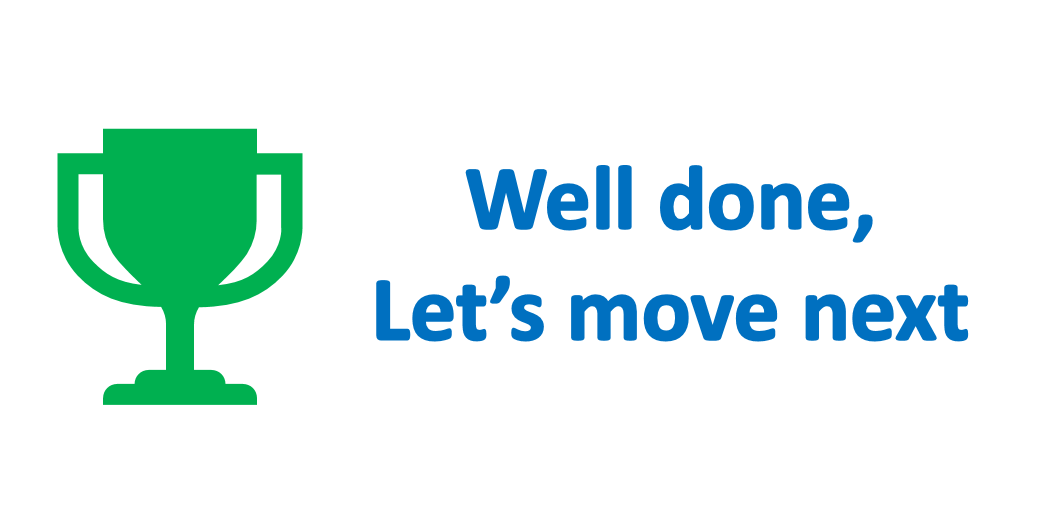